# Table of Contents
 <p><div class="lev2 toc-item"><a href="#View-Data" data-toc-modified-id="View-Data-01"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>View Data</a></div><div class="lev3 toc-item"><a href="#dtypes" data-toc-modified-id="dtypes-011"><span class="toc-item-num">0.1.1&nbsp;&nbsp;</span>dtypes</a></div><div class="lev3 toc-item"><a href="#train-&amp;-validate" data-toc-modified-id="train-&amp;-validate-012"><span class="toc-item-num">0.1.2&nbsp;&nbsp;</span>train &amp; validate</a></div><div class="lev3 toc-item"><a href="#第一个线性模型" data-toc-modified-id="第一个线性模型-013"><span class="toc-item-num">0.1.3&nbsp;&nbsp;</span>第一个线性模型</a></div><div class="lev3 toc-item"><a href="#特征筛选" data-toc-modified-id="特征筛选-014"><span class="toc-item-num">0.1.4&nbsp;&nbsp;</span>特征筛选</a></div><div class="lev3 toc-item"><a href="#验证版" data-toc-modified-id="验证版-015"><span class="toc-item-num">0.1.5&nbsp;&nbsp;</span>验证版</a></div><div class="lev3 toc-item"><a href="#提交版" data-toc-modified-id="提交版-016"><span class="toc-item-num">0.1.6&nbsp;&nbsp;</span>提交版</a></div>

## View Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
application_train = pd.read_csv("./data/application_train.csv")

In [3]:
application_train.head().T

,0,1,2,3,4
SK_ID_CURR,100002,100003,100004,100006,100007
TARGET,1,0,0,0,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans
CODE_GENDER,M,F,M,F,M
FLAG_OWN_CAR,N,N,Y,N,N
FLAG_OWN_REALTY,Y,N,Y,Y,Y
CNT_CHILDREN,0,0,0,0,0
AMT_INCOME_TOTAL,202500,270000,67500,135000,121500
AMT_CREDIT,406598,1.2935e+06,135000,312682,513000
AMT_ANNUITY,24700.5,35698.5,6750,29686.5,21865.5


### dtypes

In [4]:
application_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [5]:
application_train.dtypes[application_train.dtypes == "object"]

NAME_CONTRACT_TYPE            object
CODE_GENDER                   object
FLAG_OWN_CAR                  object
FLAG_OWN_REALTY               object
NAME_TYPE_SUITE               object
NAME_INCOME_TYPE              object
NAME_EDUCATION_TYPE           object
NAME_FAMILY_STATUS            object
NAME_HOUSING_TYPE             object
OCCUPATION_TYPE               object
WEEKDAY_APPR_PROCESS_START    object
ORGANIZATION_TYPE             object
FONDKAPREMONT_MODE            object
HOUSETYPE_MODE                object
WALLSMATERIAL_MODE            object
EMERGENCYSTATE_MODE           object
dtype: object

In [6]:
application_train.dtypes[application_train.dtypes != "object"].value_counts()

float64    65
int64      41
dtype: int64

### train & validate

In [7]:
features_obj = list(application_train.dtypes[application_train.dtypes == "object"].index)
features_num = list(application_train.dtypes[application_train.dtypes != "object"].index)
features_num.remove("SK_ID_CURR")
features_num.remove("TARGET")

In [124]:
application_train = application_train.fillna(-1)
# data_train = application_train[application_train.SK_ID_CURR < 120000]
# data_val = application_train[(application_train.SK_ID_CURR >= 120000) & (application_train.SK_ID_CURR < 150000)]
data_train = application_train[application_train.SK_ID_CURR < 350000]
data_val = application_train[application_train.SK_ID_CURR >= 350000]

print(data_train.shape)
print(data_val.shape)

(215759, 122)
(91752, 122)


In [128]:
X_num_train = data_train[features_num].values
X_num_val = data_val[features_num].values
X_obj_train = data_train[features_obj].values
X_obj_val = data_val[features_obj].values
y_train = data_train.TARGET.values
y_val = data_val.TARGET.values

In [84]:
features = features_num + features_obj

### 第一个线性模型

In [10]:
import preprocessing7 as preprocessing
import score_card4 as score_card
import score_card_fs

In [37]:
from imp import reload
reload(preprocessing)
reload(score_card_fs)

<module 'score_card_fs' from 'D:\\git\\kaggle-Home-Credit-Default-Risk\\score_card_fs.py'>

In [129]:
cutter = preprocessing.MPChi2Cutter(init_bin_num=25, max_bin_num=5, max_peak_num=1)
X_cut_train = cutter.fit_transform(X_num_train, y_train)
X_cut_val = cutter.transform(X_num_val)

encoder1 = preprocessing.MPWOEEncoder(alpha=10)
X_woe1_train = encoder1.fit_transform(X_cut_train, y_train)
X_woe1_val = encoder1.transform(X_cut_val)

encoder2 = preprocessing.MPWOEEncoder(alpha=10)
X_woe2_train = encoder2.fit_transform(X_obj_train, y_train)
X_woe2_val = encoder2.transform(X_obj_val)

X_woe_train = np.hstack([X_woe1_train, X_woe2_train])
X_woe_val = np.hstack([X_woe1_val, X_woe2_val])
X_woe_val[np.isnan(X_woe_val)] = 0

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score

def ks_score(y_true, y_score):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    auc_score = auc(fpr, tpr)
    w = tpr - fpr
    return w.max(), thresholds[np.nanargmax(w)]

clf = LogisticRegression(**{"penalty": "l1", "C": .5})
clf.fit(X_woe_train, y_train)

pred_train = clf.predict_proba(X_woe_train)[:,1]
auc_train = roc_auc_score(y_train, pred_train)

pred_val = clf.predict_proba(X_woe_val)[:,1]
auc_val = roc_auc_score(y_val, pred_val)

print("*" * 20 + " MODEL REPORT " + "*" * 20)
print("X-shape-train: {}, X-shape-val: {}".format(X_woe_train.shape, X_woe_val.shape))
print("auc-train: {:.2}, auc-val: {:.2}".format(auc_train, auc_val))
# print("ks-train: {:.2}, ks-val: {:.2}".format(ks_train, ks_val))
# print("maxks-train: {:.2}, maxks-val: {:.2}".format(th_train, th_val))

******************** MODEL REPORT ********************
X-shape-train: (17144, 120), X-shape-val: (26051, 120)
auc-train: 0.76, auc-val: 0.74


In [130]:
for c in [.2, .3, .4, .5, .6]:
    clf = LogisticRegression(**{"penalty": "l1", "C": c})
    clf.fit(X_woe_train, y_train)

    pred_train = clf.predict_proba(X_woe_train)[:,1]
    auc_train = roc_auc_score(y_train, pred_train)

    pred_val = clf.predict_proba(X_woe_val)[:,1]
    auc_val = roc_auc_score(y_val, pred_val)

    print("*" * 20 + " MODEL REPORT " + "*" * 20)
    print("alpha:", c)
    print("X-shape-train: {}, X-shape-val: {}".format(X_woe_train.shape, X_woe_val.shape))
    print("auc-train: {:.2}, auc-val: {:.3}".format(auc_train, auc_val))

******************** MODEL REPORT ********************
alpha: 0.2
X-shape-train: (215759, 120), X-shape-val: (91752, 120)
auc-train: 0.74, auc-val: 0.747
******************** MODEL REPORT ********************
alpha: 0.3
X-shape-train: (215759, 120), X-shape-val: (91752, 120)
auc-train: 0.74, auc-val: 0.747
******************** MODEL REPORT ********************
alpha: 0.4
X-shape-train: (215759, 120), X-shape-val: (91752, 120)
auc-train: 0.74, auc-val: 0.747
******************** MODEL REPORT ********************
alpha: 0.5
X-shape-train: (215759, 120), X-shape-val: (91752, 120)
auc-train: 0.74, auc-val: 0.747
******************** MODEL REPORT ********************
alpha: 0.6
X-shape-train: (215759, 120), X-shape-val: (91752, 120)
auc-train: 0.74, auc-val: 0.747


### 特征筛选

In [131]:
fs_stack = score_card_fs.FSStack(features)
fs_result = score_card_fs.filter_lasso_sc(X_woe_train, y_train, argv={"penalty": "l1", "C": .5})
fs_stack.append("filter0_lasso_sc", fs_result)

# np.random.seed(123)
# group = np.random.choice([0, 1, 2, 3, 4], X_woe_train.shape[0])
# fs_result = score_card_fs.filter_lasso_stack_mt(X_woe_train[:, fs_stack.get_latest_ids()], y_train, group, argv={"penalty": "l1", "C": .5})
# fs_stack.append("filter1_lasso_stack", fs_result)

In [132]:
def create_clf():
    return LogisticRegression(**{"penalty": "l1", "C": .5})

fs_result = score_card_fs.wrapper_backward_forward_mt(X_woe_train[:, fs_stack.get_latest_ids()], X_woe_val[:, fs_stack.get_latest_ids()], y_train, y_val, create_clf)
fs_stack.append("wrapper0_stepwise", fs_result)

metric stop inproving.


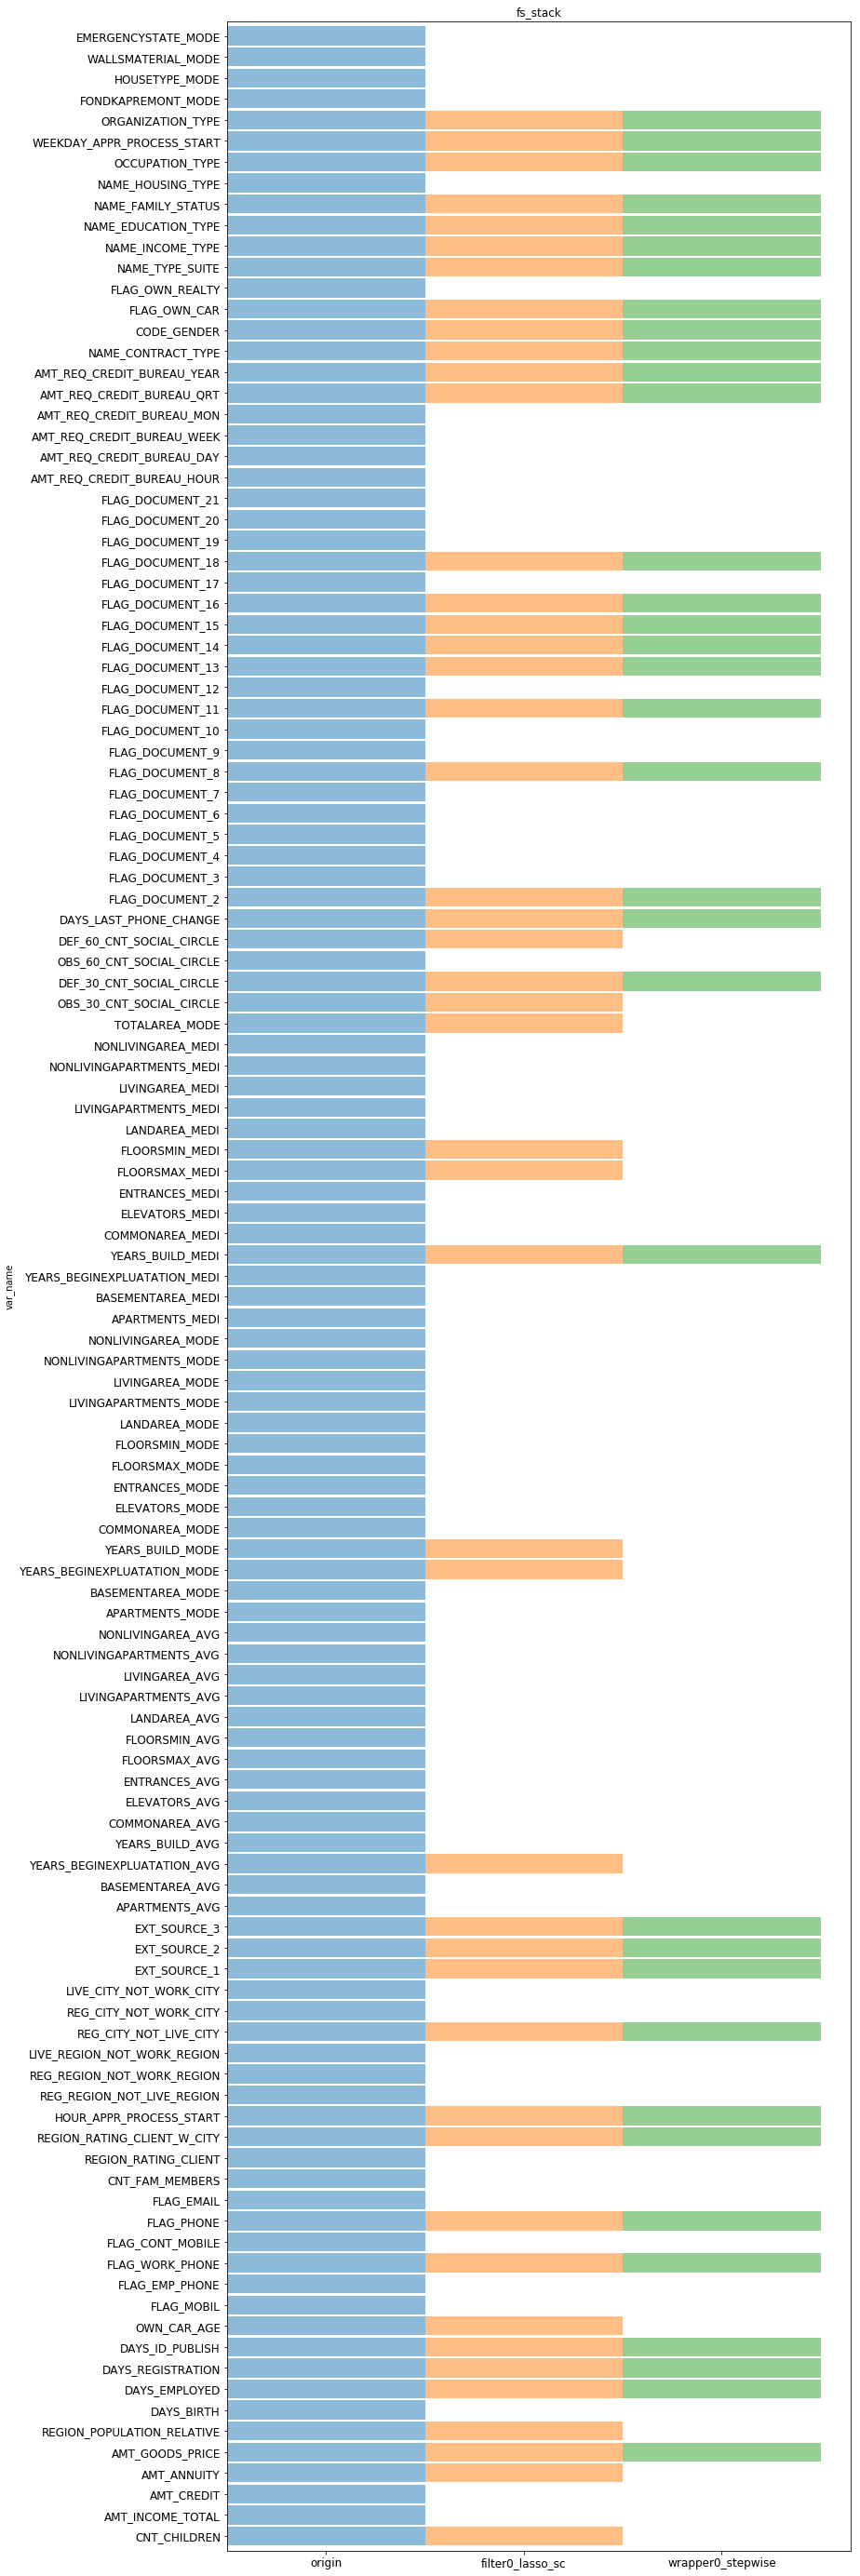

In [133]:
score_card_fs.plot_fsstack(fs_stack, argv={"figsize": (12, 50)})
plt.title("fs_stack")
plt.show()

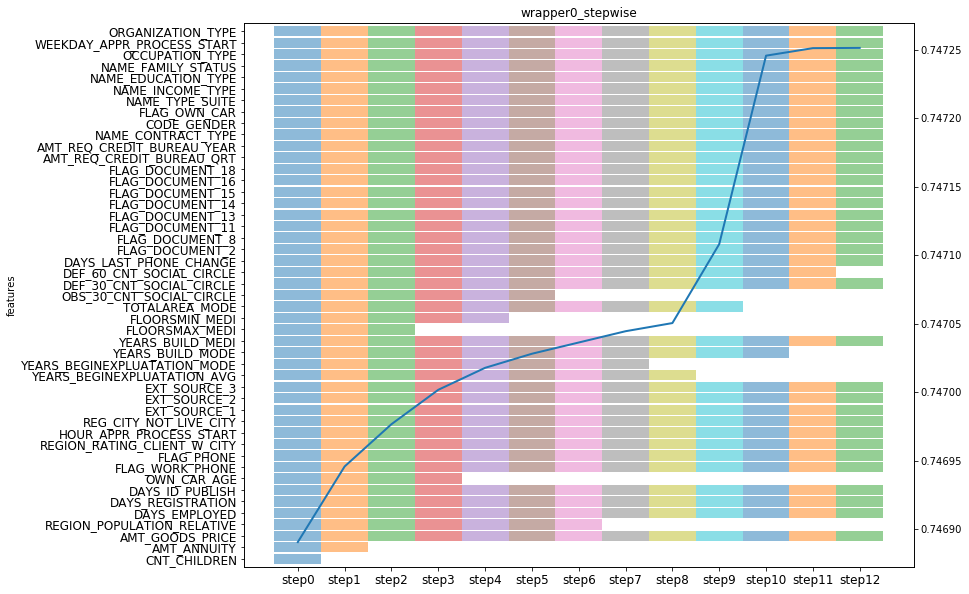

In [134]:
fs_result = fs_stack.get_fsresult(1)
score_card_fs.plot_wrapper_result(fs_result, features=fs_stack.get_selected_names(0), argv={"figsize": (12, 10)})
plt.title(fs_stack.get_fsname(1))
plt.show()

### 验证版

In [135]:
final_features = fs_stack.get_latest_names()
final_ids = fs_stack.get_latest_ids()
# final_features.remove('a_work_distance')
X_woe_train_v = X_woe_train[:, final_ids]
X_woe_val_v = X_woe_val[:, final_ids]

y_train_v = y_train
y_val_v = y_val

# LR
clf = LogisticRegression(**{"penalty": "l1", "C": .5})
clf.fit(X_woe_train_v, y_train_v)

pred_train_v = clf.predict_proba(X_woe_train_v)[:,1]
pred_val_v = clf.predict_proba(X_woe_val_v)[:,1]

auc_train_v = roc_auc_score(y_train_v, pred_train_v)
auc_val_v = roc_auc_score(y_val_v, pred_val_v)

ks_train_v, th_train_v = ks_score(y_train_v, pred_train_v)
ks_val_v, th_val_v = ks_score(y_val_v, pred_val_v)

print("*" * 20 + " MODEL REPORT " + "*" * 20)
print("X-shape-train: {}, X-shape-val: {}".format(X_woe_train_v.shape, X_woe_val_v.shape))
print("auc-train: {:.2}, auc-val: {:.2}".format(auc_train_v, auc_val_v))
print("ks-train: {:.2}, ks-val: {:.2}".format(ks_train_v, ks_val_v))
print("maxks-train: {:.2}, maxks-val: {:.2}".format(th_train_v, th_val_v))

print("*" * 20 + " LASSO COEF " + "*" * 20)
for feat_, coef_ in zip(final_features, clf.coef_[0]):
    print("{:>30} : {:.3}".format(feat_, coef_))

******************** MODEL REPORT ********************
X-shape-train: (215759, 35), X-shape-val: (91752, 35)
auc-train: 0.74, auc-val: 0.75
ks-train: 0.36, ks-val: 0.37
maxks-train: 0.082, maxks-val: 0.08
******************** LASSO COEF ********************
               AMT_GOODS_PRICE : 0.607
                 DAYS_EMPLOYED : 0.284
             DAYS_REGISTRATION : 0.258
               DAYS_ID_PUBLISH : 0.287
               FLAG_WORK_PHONE : 0.373
                    FLAG_PHONE : 0.437
   REGION_RATING_CLIENT_W_CITY : 0.34
       HOUR_APPR_PROCESS_START : 0.25
        REG_CITY_NOT_LIVE_CITY : 0.196
                  EXT_SOURCE_1 : 0.471
                  EXT_SOURCE_2 : 0.734
                  EXT_SOURCE_3 : 0.82
              YEARS_BUILD_MEDI : 0.4
      DEF_30_CNT_SOCIAL_CIRCLE : 0.747
        DAYS_LAST_PHONE_CHANGE : 0.228
               FLAG_DOCUMENT_2 : 0.888
               FLAG_DOCUMENT_8 : 1.49
              FLAG_DOCUMENT_11 : 1.33
              FLAG_DOCUMENT_13 : 0.536
        

### 提交版

In [136]:
application_test = pd.read_csv("./data/application_test.csv")

X_num_train = application_train[features_num].values
X_num_val = application_test[features_num].values
X_obj_train = application_train[features_obj].values
X_obj_val = application_test[features_obj].values
y_train = application_train.TARGET.values

In [137]:
cutter = preprocessing.MPChi2Cutter(init_bin_num=25, max_bin_num=5, max_peak_num=1)
X_cut_train = cutter.fit_transform(X_num_train, y_train)
X_cut_val = cutter.transform(X_num_val)

encoder1 = preprocessing.MPWOEEncoder(alpha=10)
X_woe1_train = encoder1.fit_transform(X_cut_train, y_train)
X_woe1_val = encoder1.transform(X_cut_val)

encoder2 = preprocessing.MPWOEEncoder(alpha=10)
X_woe2_train = encoder2.fit_transform(X_obj_train, y_train)
X_woe2_val = encoder2.transform(X_obj_val)

X_woe_train = np.hstack([X_woe1_train, X_woe2_train])
X_woe_val = np.hstack([X_woe1_val, X_woe2_val])
X_woe_val[np.isnan(X_woe_val)] = 0

In [138]:
final_features = fs_stack.get_latest_names()
final_ids = fs_stack.get_latest_ids()
# final_features.remove('a_work_distance')
X_woe_train_v = X_woe_train[:, final_ids]
X_woe_val_v = X_woe_val[:, final_ids]

y_train_v = y_train
y_val_v = y_val

# LR
clf = LogisticRegression(**{"penalty": "l1", "C": .5})
clf.fit(X_woe_train_v, y_train_v)

pred_train_v = clf.predict_proba(X_woe_train_v)[:,1]
pred_val_v = clf.predict_proba(X_woe_val_v)[:,1]

auc_train_v = roc_auc_score(y_train_v, pred_train_v)
# auc_val_v = roc_auc_score(y_val_v, pred_val_v)

ks_train_v, th_train_v = ks_score(y_train_v, pred_train_v)
# ks_val_v, th_val_v = ks_score(y_val_v, pred_val_v)

print("*" * 20 + " MODEL REPORT " + "*" * 20)
print("X-shape-train: {}, X-shape-val: {}".format(X_woe_train_v.shape, X_woe_val_v.shape))
print("auc-train: {:.2}".format(auc_train_v))
print("ks-train: {:.2}".format(ks_train_v))
print("maxks-train: {:.2}".format(th_train_v))

print("*" * 20 + " LASSO COEF " + "*" * 20)
for feat_, coef_ in zip(final_features, clf.coef_[0]):
    print("{:>30} : {:.3}".format(feat_, coef_))

******************** MODEL REPORT ********************
X-shape-train: (307511, 35), X-shape-val: (48744, 35)
auc-train: 0.74
ks-train: 0.36
maxks-train: 0.078
******************** LASSO COEF ********************
               AMT_GOODS_PRICE : 0.595
                 DAYS_EMPLOYED : 0.282
             DAYS_REGISTRATION : 0.258
               DAYS_ID_PUBLISH : 0.235
               FLAG_WORK_PHONE : 0.362
                    FLAG_PHONE : 0.387
   REGION_RATING_CLIENT_W_CITY : 0.355
       HOUR_APPR_PROCESS_START : 0.247
        REG_CITY_NOT_LIVE_CITY : 0.22
                  EXT_SOURCE_1 : 0.474
                  EXT_SOURCE_2 : 0.735
                  EXT_SOURCE_3 : 0.825
              YEARS_BUILD_MEDI : 0.398
      DEF_30_CNT_SOCIAL_CIRCLE : 0.711
        DAYS_LAST_PHONE_CHANGE : 0.239
               FLAG_DOCUMENT_2 : 0.925
               FLAG_DOCUMENT_8 : 1.56
              FLAG_DOCUMENT_11 : 1.54
              FLAG_DOCUMENT_13 : 0.653
              FLAG_DOCUMENT_14 : 0.564
           

In [139]:
application_test["TARGET"] = pred_val_v
application_test[["SK_ID_CURR", "TARGET"]].to_csv("./result/submission-000-more.csv", index=False)